# Задача классификации. Real / Fake Job Posting Prediction

Датасет - https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

## Постановка задачи
В данном датасете находятся примерно 18 тысяч вакансий, среди которых около 800 были признаны мошеннеческими.
На основе этих данных решим задачу классификации - будем определять, реальна ли вакансия.

## 0. Подключение библиотек и чтение датасета

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [37]:
df = pd.read_csv("fake_job_postings.csv")

In [38]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


### Признаки:

1) `job_id` - идентификационный номер вакансии
2) `title` - название вакансии
3) `location` - город
4) `department` - к какому отделу относится вакансия
5) `salary_range` - зарплатный диапазон
6) `company_profile` - описание компании, опубликовавшей вакансию
7) `description` - описание вакансии
8) `requirements` - требования
9) `benefits` - бонусы при трудоустройстве
10) `telecommuting` - удаленная ли работа
11) `has_company_logo` - есть ли у компании логотип
12) `has_questions` - есть ли в вакансии примеры вопросов с собеседования
13) `employment_type` - тип трудоустройства (полный рабочий день, неполный рабочий день, работа по контракту)
14) `required_experience` - требуемый опыт работы
15) `required_education` - требуемый уровень образования
16) `industry` - тип деятельности компании
17) `function` - чем предстоит заниматься сотруднику
18) `fradulent` - является ли вакансия фейковой

## 1. Визуализация данных

In [39]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [40]:
df.describe(include = 'all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


Мы видим следующее:
* Наиболее частая локация: Лондон
* Наиболее частый отдел: Продажи
* Наиболее частый вид трудоустройства: полный рабочий день
* Наиболее частый опыт работы: Средний/Старший специалист
* Наиболее частый уровень образования: Бакалавр
* Наиболее частый вид деятельности компании: IT
* В менее чем в 25% вакансий предлагается удаленная работа
* Менее 25% вакансий признаны фейковыми
* В менее чем 50% вакансий присутствуют примеры из собеседований

Удалим столбец job_id:

In [41]:
df = df.drop('job_id', axis=1)

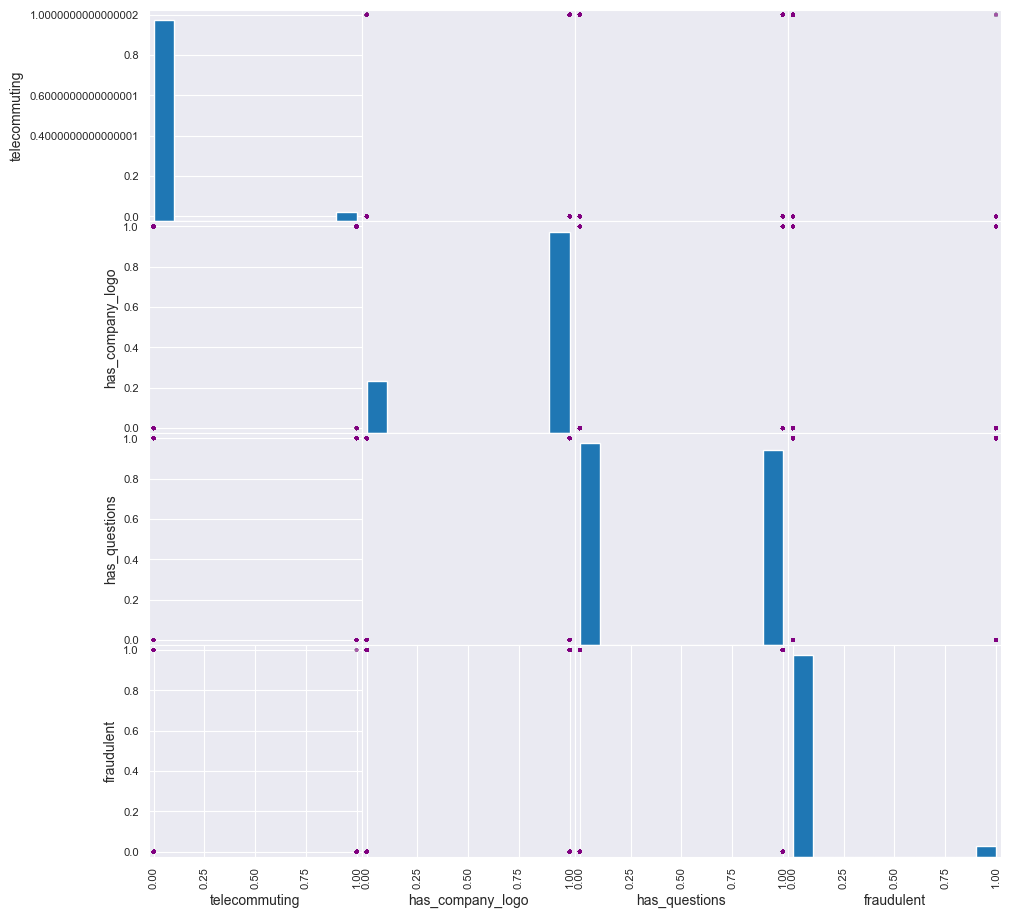

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (11, 11), color='purple')
pass

In [43]:
corr_mat = df.corr()
corr_mat

C:\Users\Diana\AppData\Local\Temp\ipykernel_10492\290047525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.019836,1.000000,0.233932,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.034523,-0.261971,-0.091627,1.000000


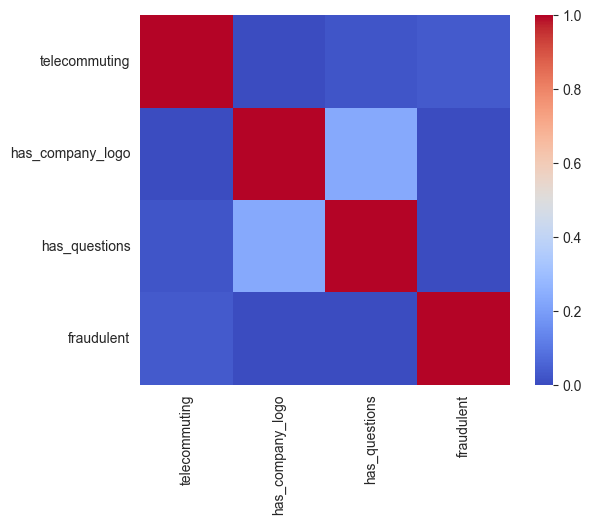

In [44]:
sns.heatmap(corr_mat, vmin=0.0, vmax=1.0, square=True, cmap='coolwarm')
pass

Есть сильная корреляция между возможностью удаленной работы и фейковостью вакансии

## 2. Пропущенные значения

In [45]:
df.isna().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Обработаем пропущенные значения:

In [46]:
columns_list=list(df.columns)

for i in columns_list:
    if df[i].dtype=='object':
        df[i]=df[i].replace(np.nan,df[i].mode()[0],regex=True)

df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0-0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0-0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,0-0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0-0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,0-0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0-0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0-0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Sales,0-0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,See job description,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,Graphic Designer,"NG, LA, Lagos",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


## 3. Обработка категориальных признаков

Для обучения модели опустим поля `department`, `company profile`, `description`, `benefits`, `requirements`

In [47]:
df = df.drop(['department', 'company_profile', 'description', 'benefits', 'requirements', 'title'], axis=1)

In [48]:
df

,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",0-0,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,"NZ, , Auckland",0-0,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,"US, IA, Wever",0-0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,"US, DC, Washington",0-0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,"US, FL, Fort Worth",0-0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,"CA, ON, Toronto",0-0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,"US, PA, Philadelphia",0-0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,"US, TX, Houston",0-0,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,"NG, LA, Lagos",0-0,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Закодируем категориальные признаки при помощи LabelEncoder

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_list=list(df.columns)
for i in columns_list:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

df

,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,2535,0,0,1,0,2,4,1,58,22,0
1,1073,0,0,1,0,1,6,1,75,7,0
2,1867,0,0,1,0,1,5,1,58,18,0
3,1703,0,0,1,0,1,5,1,22,31,0
4,1741,0,0,1,1,1,5,1,51,16,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,166,0,0,1,1,1,5,1,22,31,0
17876,2734,0,0,1,1,1,5,1,61,0,0
17877,2875,0,0,0,0,1,5,1,58,18,0
17878,1045,0,0,0,1,0,6,6,48,9,0


## 4. Нормировка

Все числовые признаки уже находятся в диапазоне [0;1], нормировка не требуется

## 5. Обучение модели

Разделим датасет на обучающую и тестовую выборки

In [54]:
x=df.drop(['fraudulent'],axis=1)
y=df['fraudulent']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.25)

### Метод kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[4232  130]
 [  41   67]]


C:\Users\Diana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


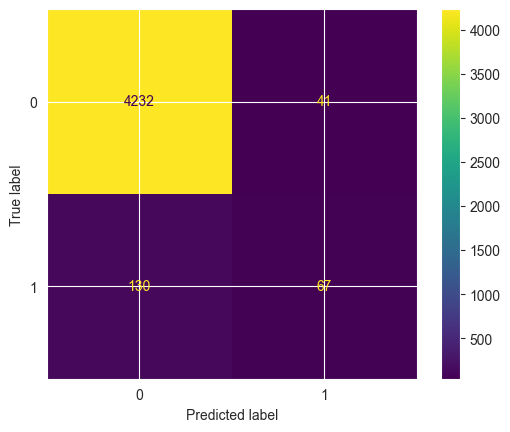

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)

Точность классификатора:

In [58]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.9648769574944072
Test:  0.961744966442953
